<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss_chapter_6_SAE_6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss2tf, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


Transfer function:  
 2.665e-15 s^2 + s - 1
-----------------------
s^3 - 4 s^2 - 33 s + 51

Poles =  [ 7.49504351+0.j -4.88731938+0.j  1.39227587+0.j]
Zeros =  [-3.75299969e+14+0.j  1.00000000e+00+0.j]


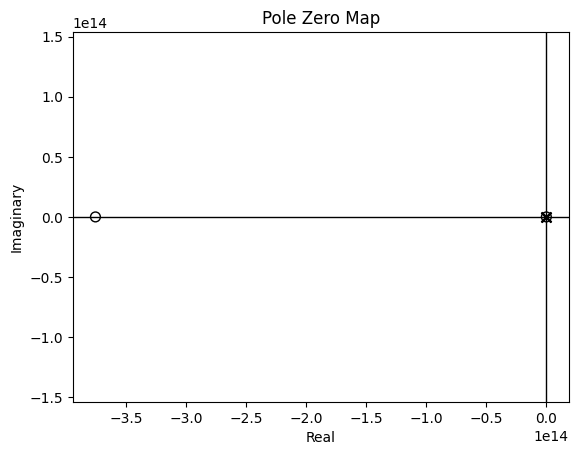

In [3]:
# Define your system in state space
A = np.array([[2, 1, 1],[1, 7, 1],[-3, 4, -5]])
B = np.array([[0],[0],[1]])
C = np.array([[0, 1, 0]])
D = np.array([[0]])

sys = ss(A, B, C, D)
TF = ss2tf(sys)
(p,z) = pzmap(TF)

print('Transfer function: ', TF)
print("Poles = ",p)
print("Zeros = ",z)
plt.show()
#plt.savefig ("poles_zeros.pdf")

(3,)
[ 7.49504351 -4.88731938  1.39227587]


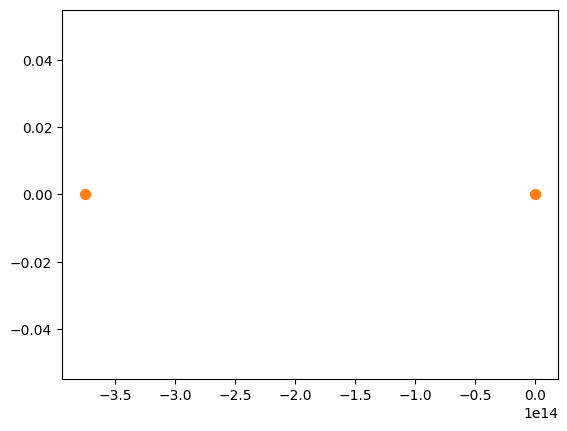

In [7]:
print(p.shape)
print(p.real)
plt.figure
plt.scatter(p.real,p.imag, s=50, marker='*')
plt.scatter(z.real,z.imag, s=50, marker='o')
plt.grid
plt.show()

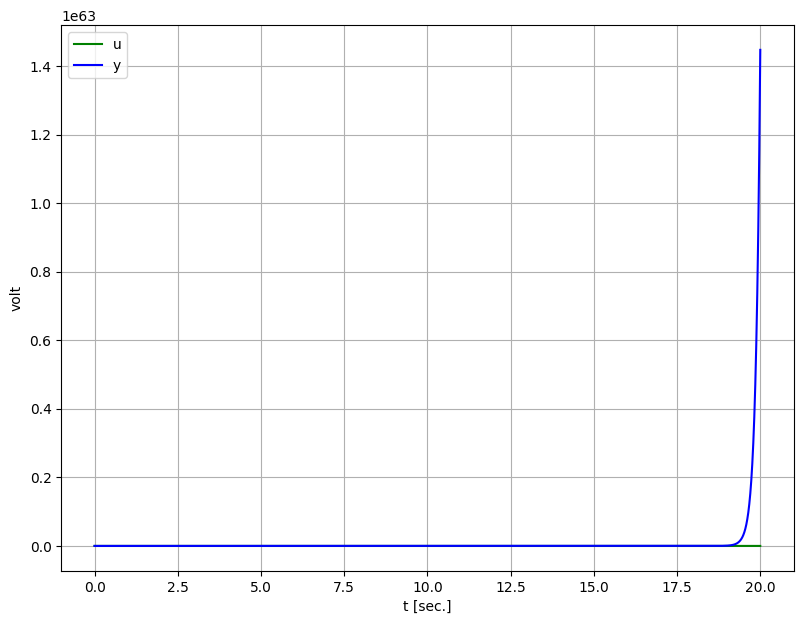

In [5]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")